In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_train_img,y_train_label),\
(x_test_img,y_test_label) = cifar10.load_data()

In [3]:
##查看資料
print("train:",len(x_train_img))
x_train_img.shape


train: 50000


(50000, 32, 32, 3)

In [4]:
##建立y_label dict
label_dict={0:'airplane',1:'autompbile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [5]:
import matplotlib.pyplot as plt
def plot_images_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num > 25: num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(images[idx],cmap='binary')
            
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        ax.set_title(title,fontsize = 10)
        ax.set_xticks([]);ax.set_yticks([])
        idx+=1
    plt.show()

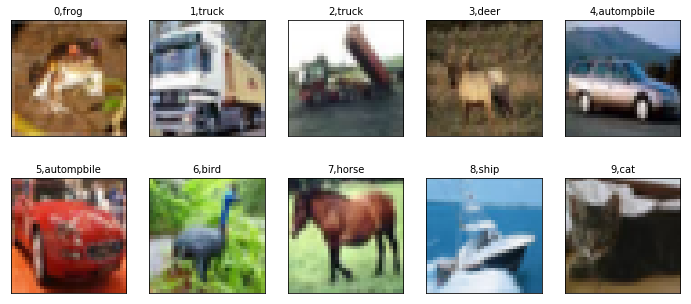

In [6]:
plot_images_prediction(x_train_img,y_train_label,[],0)

In [7]:
##資料預處理
x_train_img[0][0][0]


array([59, 62, 63], dtype=uint8)

In [8]:
#將影像數字標準化
x_train_img_normalize = x_train_img.astype('float32') / 255.0 
x_test_img_normalize = x_test_img.astype('float32') / 255.0 

In [9]:
y_train_label[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
##label標籤欄位轉為OneHot encoding
from keras.utils import np_utils
y_train_label_OneHot = np_utils.to_categorical(y_train_label)
y_test_label_OneHot = np_utils.to_categorical(y_test_label)

In [11]:
##前五筆圖的label OneHot量化
y_train_label_OneHot[:5]

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
##匯入模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Conv2D,MaxPooling2D,ZeroPadding2D

In [13]:
#建立Sequential模型
model=Sequential()

In [14]:
#建立卷積層1
model.add(Conv2D(filters = 32,
                 kernel_size=(3,3),
                 input_shape = (32,32,3),
                 activation = 'relu',
                 padding = 'same'))

In [15]:
##避免overfitting
model.add(Dropout(rate=0.25))

In [16]:
#建立池化層1
model.add(MaxPooling2D(pool_size=(2,2)))

In [17]:
#建立卷積層2
model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation = 'relu',
                 padding = 'same'))

In [18]:
model.add(Dropout(rate=0.25))

In [19]:
##池化層2
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
#建立平坦層
model.add(Flatten())
#隨機拋棄25%神經元
model.add(Dropout(rate=0.25))

In [21]:
##建立隱藏層
model.add(Dense(1024,
                activation = 'relu'))
model.add(Dropout(rate=0.25))

In [22]:
#建立輸出層 將輸出轉換成每一個預測影像類別的機率
model.add(Dense(10,
                activation = 'softmax'))

In [23]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [24]:
##定義訓練方式
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [25]:
##開始訓練
train_history = model.fit(x_train_img_normalize,y_train_label_OneHot,
                          validation_split = 0.2,
                          epochs = 10,
                          batch_size = 128,
                          verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 102s - loss: 1.5029 - acc: 0.4592 - val_loss: 1.2867 - val_acc: 0.5745
Epoch 2/10
40000/40000 [==============================] - 102s - loss: 1.1415 - acc: 0.5942 - val_loss: 1.1087 - val_acc: 0.6409
Epoch 3/10
40000/40000 [==============================] - 103s - loss: 0.9831 - acc: 0.6557 - val_loss: 1.0080 - val_acc: 0.6633
Epoch 4/10
40000/40000 [==============================] - 110s - loss: 0.8811 - acc: 0.6909 - val_loss: 0.9526 - val_acc: 0.6932
Epoch 5/10
40000/40000 [==============================] - 104s - loss: 0.7880 - acc: 0.7231 - val_loss: 0.8776 - val_acc: 0.7031
Epoch 6/10
40000/40000 [==============================] - 93s - loss: 0.7073 - acc: 0.7515 - val_loss: 0.8728 - val_acc: 0.7078
Epoch 7/10
40000/40000 [==============================] - 130s - loss: 0.6288 - acc: 0.7783 - val_loss: 0.8090 - val_acc: 0.7301
Epoch 8/10
40000/40000 [========================

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train_History')
    plt.ylabel(train)
    plt.legend(['train'],['validation'],loc='upper left')#設定legend圖例train validation(驗證) loc位置在左上方
    plt.show()

/home/minglu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


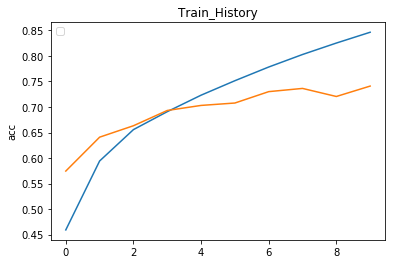

In [27]:
show_train_history(train_history,'acc','val_acc')

/home/minglu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/matplotlib/legend.py:634: UserWarning: Legend does not support 'train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


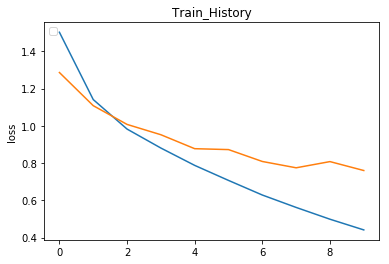

In [28]:
show_train_history(train_history,'loss','val_loss')

In [30]:
##評估模型準確率
scores = model.evaluate(x_train_img_normalize,
                        y_train_label_OneHot,verbose=1)


49984/50000 [============================>.] - ETA: 0s

In [36]:
scores[1]

0.88861999999999997

In [37]:
prediction=model.predict_classes(x_test_img_normalize)

 9952/10000 [============================>.] - ETA: 0s

In [39]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

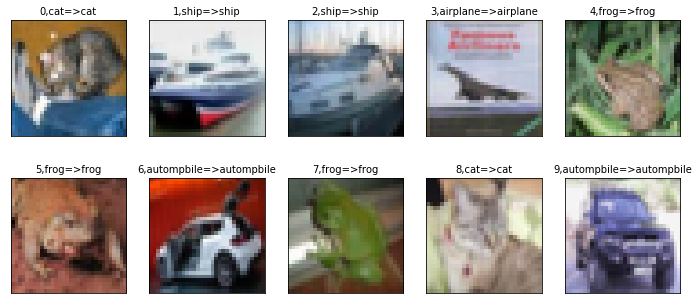

In [40]:
plot_images_prediction(x_test_img,y_test_label,prediction,0,10)

In [42]:
##查看預測機率
predicted_Probability=model.predict(x_test_img_normalize)
predicted_Probability

array([[  3.08675598e-03,   9.44101438e-03,   6.79485686e-03, ...,
          2.25440878e-03,   1.37988310e-02,   4.56017628e-03],
       [  2.77862092e-03,   1.38351679e-01,   1.28551187e-06, ...,
          3.36712547e-09,   8.58360887e-01,   4.98010369e-04],
       [  2.16249928e-01,   6.55148625e-02,   5.97670116e-03, ...,
          8.45367962e-04,   6.93493009e-01,   1.24854157e-02],
       ..., 
       [  5.48591088e-05,   6.77314176e-07,   4.32940237e-02, ...,
          8.91132560e-03,   1.61927936e-04,   4.48215251e-05],
       [  2.40126885e-02,   2.87435383e-01,   9.54515263e-02, ...,
          1.00049675e-02,   9.07347945e-04,   2.32003443e-03],
       [  1.11760555e-05,   2.02883730e-05,   5.72071876e-04, ...,
          8.87610376e-01,   4.56559155e-06,   8.59329248e-06]], dtype=float32)

In [49]:
#建立show_predict_Probability
def show_predict_Probability(y,prediction,x,predicted_Probability,i):
    #顯示y(y_test_label)與predict預測結果
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    #設定顯示影像的大小並且畫出照片影像
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_test_img[i],(32,32,3)))
    plt.show()
    #使用for 迴圈讀取predict_Probability顯示預測機率
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f' %(predicted_Probability[i][j]))

label: cat predict: cat


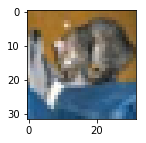

airplane Probability:0.003086756
autompbile Probability:0.009441014
bird Probability:0.006794857
cat Probability:0.542578101
deer Probability:0.005063491
dog Probability:0.372498721
frog Probability:0.039923657
horse Probability:0.002254409
ship Probability:0.013798831
truck Probability:0.004560176


In [50]:
show_predict_Probability(y_test_label,prediction,x_test_img,predicted_Probability,0)

label: airplane predict: airplane


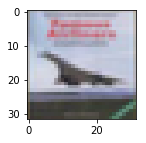

airplane Probability:0.715759873
autompbile Probability:0.001360696
bird Probability:0.089315318
cat Probability:0.000591209
deer Probability:0.007182307
dog Probability:0.000039545
frog Probability:0.000031933
horse Probability:0.000072679
ship Probability:0.185077459
truck Probability:0.000568906


In [52]:
show_predict_Probability(y_test_label,prediction,x_test_img,predicted_Probability,3)

In [53]:
y_test_label.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7])

In [56]:
##顯示混淆矩陣(顯示圖片是貓被預測到其他種類的圖片有幾張)
import pandas as pd
print(label_dict)
pd.crosstab(y_test_label.reshape(-1),prediction,
            rownames = ['label'],colnames = ['predict'])
##對角線是正確預測的張數

{0: 'airplane', 1: 'autompbile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,798,13,74,8,17,5,13,5,52,15
1,22,845,17,12,5,5,20,0,21,53
2,51,3,673,28,78,59,80,17,8,3
3,19,9,97,445,54,199,139,21,9,8
4,19,3,92,40,691,28,91,26,10,0
5,16,2,62,114,48,674,49,21,7,7
6,3,4,42,23,14,14,896,2,2,0
7,16,2,54,33,79,74,16,720,4,2
8,62,23,23,6,11,7,16,4,836,12


In [71]:
##建立三次卷積層
model=Sequential()
#建立雙層卷積層池化層1
model.add(Conv2D(filters=32,
                 kernel_size = (3,3),
                 input_shape = (32,32,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(rate=0.3))
model.add(Conv2D(filters=32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
#建立雙層卷積層2池化層2
model.add(Conv2D(filters=64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
#建立雙層卷積層3池化層3
model.add(Conv2D(filters=128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
#建立神經網路(平坦層,隱藏層1,隱藏層2,輸出層)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

In [72]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_36 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_37 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
train_history = model.fit(x_train_img_normalize,y_train_label_OneHot,
                          validation_split = 0.2,
                          epochs = 50,#提昇準確率訓練50次
                          batch_size = 300,#一次訓練300個
                          verbose=1)
            ##評估模型準確率
scores = model.evaluate(x_train_img_normalize,
                        y_train_label_OneHot,verbose=1)
         

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 251s - loss: 1.9511 - acc: 0.2666 - val_loss: 1.8724 - val_acc: 0.3154
Epoch 2/50
40000/40000 [==============================] - 256s - loss: 1.5302 - acc: 0.4337 - val_loss: 1.6160 - val_acc: 0.4265
Epoch 3/50
40000/40000 [==============================] - 256s - loss: 1.3240 - acc: 0.5181 - val_loss: 1.3194 - val_acc: 0.5346
Epoch 4/50
40000/40000 [==============================] - 253s - loss: 1.1921 - acc: 0.5675 - val_loss: 1.1006 - val_acc: 0.6074
Epoch 5/50
40000/40000 [==============================] - 255s - loss: 1.0645 - acc: 0.6177 - val_loss: 1.0360 - val_acc: 0.6334
Epoch 6/50
40000/40000 [==============================] - 256s - loss: 0.9774 - acc: 0.6471 - val_loss: 1.0185 - val_acc: 0.6440
Epoch 7/50
40000/40000 [==============================] - 257s - loss: 0.9004 - acc: 0.6771 - val_loss: 0.9209 - val_acc: 0.6790
Epoch 8/50
40000/40000 [=======================

In [ ]:
##評估模型準確率
scores = model.evaluate(x_train_img_normalize,
                        y_train_label_OneHot,verbose=1)
scores[1]

In [69]:
##建立三次卷積層
model=Sequential()
#建立單層卷積層池化層1
model.add(Conv2D(filters=32,
                 kernel_size = (3,3),
                 input_shape = (32,32,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(rate=0.3))
model.add(MaxPooling2D(pool_size = (2,2)))
#建立單層卷積層2池化層2
model.add(Conv2D(filters=64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(rate=0.3))
model.add(MaxPooling2D(pool_size = (2,2)))
#建立單層卷積層3池化層3
model.add(Conv2D(filters=128,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Dropout(rate=0.3))
model.add(MaxPooling2D(pool_size = (2,2)))
#建立神經網路(平坦層,隱藏層1,隱藏層2,輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.3))
model.add(Dense(2500,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(10,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_30 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_31 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 128)         73856     
__________

In [70]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
train_history = model.fit(x_train_img_normalize,y_train_label_OneHot,
                          validation_split = 0.2,
                          epochs = 50,#提昇準確率訓練50次
                          batch_size = 300,#一次訓練300個
                          verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 113s - loss: 1.7170 - acc: 0.3647 - val_loss: 1.6815 - val_acc: 0.4176
Epoch 2/50
40000/40000 [==============================] - 116s - loss: 1.3442 - acc: 0.5148 - val_loss: 1.5345 - val_acc: 0.4762
Epoch 3/50
40000/40000 [==============================] - 117s - loss: 1.1792 - acc: 0.5778 - val_loss: 1.2853 - val_acc: 0.5800
Epoch 4/50
40000/40000 [==============================] - 114s - loss: 1.0626 - acc: 0.6200 - val_loss: 1.1877 - val_acc: 0.6078
Epoch 5/50
40000/40000 [==============================] - 115s - loss: 0.9746 - acc: 0.6548 - val_loss: 1.1670 - val_acc: 0.6082
Epoch 6/50
40000/40000 [==============================] - 117s - loss: 0.8916 - acc: 0.6850 - val_loss: 1.0526 - val_acc: 0.6561
Epoch 7/50
40000/40000 [==============================] - 114s - loss: 0.8177 - acc: 0.7077 - val_loss: 1.0242 - val_acc: 0.6573
Epoch 8/50
40000/40000 [=======================

KeyboardInterrupt: 